In [1]:
import glacierml as gl
import pandas as pd
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import glob
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


2023-08-18 15:06:13.959037: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-18 15:06:14.010065: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-18 15:06:14.707354: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
parameterization = '4'
data = gl.parameterize_data(parameterization)
model_statistics = pd.read_pickle('zults/model_statistics_' + parameterization + '.pkl')

architecture_weights, residual_model = gl.compute_model_weights(
    parameterization, loss = 'first',pth = '/data/fast1/glacierml/data'
)

architecture_weights
aw = architecture_weights

2.0.0


In [3]:
aw

,aw_1,layer architecture,simple var,std_1,IQR_1,bias_1,std_2,IQR_2,bias_2,std_3,IQR_3,bias_3,IQR_4,aw_2,aw_3,aw_4,var_1,var_2,var_3
0,745.051943,3-2,848.008118,27.019189,0.65,15.015345,22.031031,0.53,16.192550,22.031031,0.53,13.805426,15.567548,501.558894,499.171771,848.008118,730.036598,485.366344,485.366344
1,608.827207,4-2,618.440430,24.398230,0.61,13.553557,21.198463,0.53,14.055367,21.198463,0.53,13.283709,7.413118,463.430181,462.658523,618.440430,595.273650,449.374814,449.374814
2,610.339410,5-2,822.752563,24.399938,0.58,14.982456,22.296495,0.53,15.443266,22.296495,0.53,13.971775,17.791484,512.576941,511.105450,822.752563,595.356954,497.133675,497.133675
3,597.337156,6-2,766.819458,24.145896,0.58,14.312839,22.064354,0.53,14.339661,22.064354,0.53,13.826307,15.567548,501.175365,500.662011,766.819458,583.024317,486.835704,486.835704
4,626.569117,7-2,741.704468,24.729485,0.60,15.021697,21.844378,0.53,15.731676,21.844378,0.53,13.688463,11.119677,492.908538,490.865325,741.704468,611.547420,477.176862,477.176862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,533.792286,16-15,948.973206,22.761488,0.52,15.706934,23.199209,0.53,15.230605,23.199209,0.53,14.537448,20.015419,553.433916,552.740759,948.973206,518.085351,538.203311,538.203311
157,590.794041,17-15,913.624878,23.987176,0.55,15.409427,23.114915,0.53,15.130714,23.114915,0.53,14.484626,20.756731,549.430014,548.783926,913.624878,575.384614,534.299299,534.299299
158,540.292093,18-15,882.533386,22.927340,0.53,14.629165,22.927340,0.53,13.923596,22.927340,0.53,14.367085,19.274107,539.586525,540.030014,882.533386,525.662929,525.662929,525.662929
159,526.804144,19-15,916.989563,22.622037,0.52,15.047602,23.057076,0.53,14.309415,23.057076,0.53,14.448382,19.274107,545.938159,546.077127,916.989563,511.756541,531.628744,531.628744


In [4]:
aw = aw.sort_values('layer architecture')
aw = aw.reset_index()
aw = aw.drop('index',axis = 1)

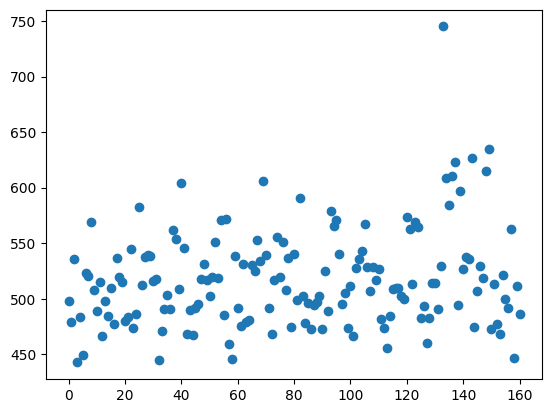

In [5]:
plt.scatter(
    aw.index,
    aw.aw_1
)

In [6]:
aw['IQR_1'] / 1.34896

0      0.392895
1      0.385482
2      0.392895
3      0.370656
4      0.378069
         ...   
156    0.378069
157    0.400308
158    0.370656
159    0.385482
160    0.378069
Name: IQR_1, Length: 161, dtype: float64

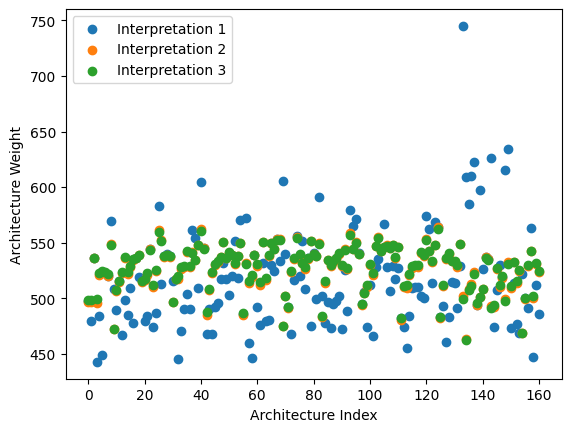

In [7]:
plt.scatter(
    aw.index,
    aw.aw_1,
    label = 'Interpretation 1'
)
plt.scatter(
    aw.index,
    aw.aw_2,
    label = 'Interpretation 2'
)
plt.scatter(
    aw.index,
    aw.aw_3,
    label = 'Interpretation 3'
)
plt.ylabel('Architecture Weight')
plt.xlabel('Architecture Index')
plt.legend()


In [8]:

# plt.plot(
#     aw.index, 
#     1 / (np.cumsum(1/ architecture_weights['architecture weight']))
# )
# plt.title('Cumulative Thickness Variance' +  
#           r' $\hat{\sigma}_{l}^{2} =\frac{{1}}{{\sum_{i}1 / \sigma^{2}_{il}}}$'
#          )
# plt.xlabel('Architecture Index (i)')
# plt.ylabel('Composite Variance $(\hat{\sigma}_{l}^{2})$')
# plt.grid(visible = None)

# Model Weighting

In [9]:
# parameterization = '4'
# est = pd.read_pickle('model_weights/param' + parameterization + '_weighting_data.pkl')

In [10]:
# est

In [11]:
model_list = [
     '0', '1', '2', '3', '4', '5', '6', '7', '8',
     '9', '10', '11', '12', '13', '14', '15', '16',
     '17', '18', '19', '20', '21', '22', '23', '24',
]
pool_list = [
     'pr_0', 'pr_1', 'pr_2', 'pr_3', 'pr_4', 'pr_5', 'pr_6', 'pr_7', 'pr_8',
     'pr_9', 'pr_10', 'pr_11', 'pr_12', 'pr_13', 'pr_14', 'pr_15', 'pr_16',
     'pr_17', 'pr_18', 'pr_19', 'pr_20', 'pr_21', 'pr_22', 'pr_23', 'pr_24',
]
res_list = [
     'r_0', 'r_1', 'r_2', 'r_3', 'r_4', 'r_5', 'r_6', 'r_7', 'r_8',
     'r_9', 'r_10', 'r_11', 'r_12', 'r_13', 'r_14', 'r_15', 'r_16',
     'r_17', 'r_18', 'r_19', 'r_20', 'r_21', 'r_22', 'r_23', 'r_24',
]
weight_list = [
     'w_0', 'w_1', 'w_2', 'w_3', 'w_4', 'w_5', 'w_6', 'w_7', 'w_8',
     'w_9', 'w_10', 'w_11', 'w_12', 'w_13', 'w_14', 'w_15', 'w_16',
     'w_17', 'w_18', 'w_19', 'w_20', 'w_21', 'w_22', 'w_23', 'w_24',
]

In [12]:
# est[model_list] = np.round(est[model_list], 0)
# est[pool_list] = np.round(est[pool_list], 2)

In [13]:
# est

In [14]:

# df = pd.DataFrame()
# for i in tqdm(range(0,54901,161)):
# #     print(i)
# #     print(i + 161)
# #     print('')
    
#     dfg = est[model_list].iloc[i:i+161]
#     y = pd.DataFrame(dfg.var(axis = 0)).astype(float)
#     x = est[[
#          'CenLat',
#          'CenLon',
#          'Slope',
#          'Zmin',
#          'Zmed',
#          'Zmax',
#          'Area',
#          'Aspect',
#          'Lmax',
#          'Thickness',
#     ]].iloc[i:i+25]
    
#     dft = pd.concat([x.reset_index(drop=True),y.reset_index(drop=True)],axis=1)
#     df = pd.concat([df, dft])
# #     break
# for i in list(x):
#     fig, ax = plt.subplots(1,1,figsize = (10,10))
#     plt.scatter(
#         df[i],
#         df[0]
#     )
#     plt.title(i)

(0.0, 1150.0)

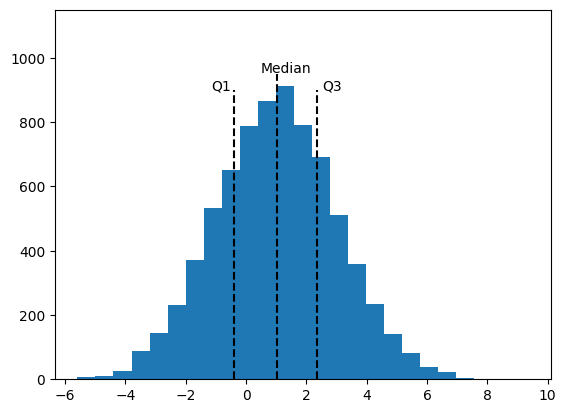

In [15]:
f = np.random.normal(1, 2, 7500)
# f = np.random.normal(1, 2, 216501)

plt.hist((f), 25)
# plt.yscale('log')
plt.plot(
    [np.percentile(f,50),np.percentile(f,50)],
    [0,950], 'k--'
)
plt.plot(
    [np.percentile(f,25),np.percentile(f,25)],
    [0,900], 'k--'
)
plt.plot(
    [np.percentile(f,75),np.percentile(f,75)],
    [0,900], 'k--'
)
plt.text(
    
    
    (f).mean() - 0.5,
    955, s = 'Median'
)
plt.text(
    np.percentile(f,75) + .18 ,
    900, s = 'Q3'
)
plt.text(
    np.percentile(f, 25) - 0.76,
    900, s = 'Q1'
)


np.percentile(f,75) - np.percentile(f, 25)
plt.ylim([0,1150])
# plt.xscale('log')

In [16]:

# f = est[pool_list].to_numpy().flatten()
# plt.hist((f), 25)
# plt.yscale('log')
# plt.plot(
#     [f.mean(),f.mean()],
#     [0,1e7], 'k--'
# )
# plt.plot(
#     [np.percentile(f,25),np.percentile(f,25)],
#     [0,1e7], 'k--'
# )
# plt.plot(
#     [np.percentile(f,75),np.percentile(f,75)],
#     [0,1e7], 'k--'
# )
# # plt.text(
    
    
#     (f).mean() - 0.5,
#     1e7, s = 'Median'
# )
# plt.text(
#     np.percentile(f,75) + .18 ,
#     4000000, s = 'Q3'
# )
# plt.text(
#     np.percentile(f, 25) - 0.76,
#     4000000, s = 'Q1'
# )

# plt.ylim([0,1150])
# plt.xscale('log')

In [17]:
# f = est[pool_list][est[pool_list].values <2]

In [18]:
# f

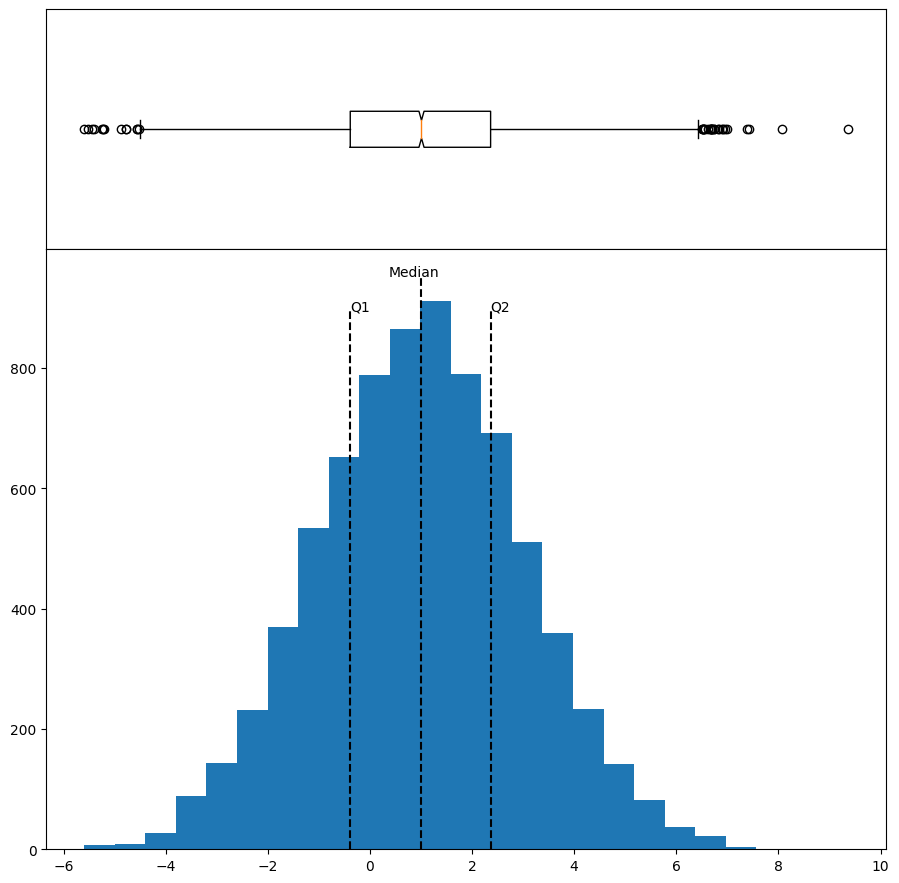

2.74871134989599

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# fake data
x = f

# setup the figure and axes
fig = plt.figure(figsize = (12,12))
bpAx = fig.add_axes([0.2, 0.7, 0.7, 0.2])   # left, bottom, width, height:
                                            # (adjust as necessary)
histAx = fig.add_axes([0.2, 0.2, 0.7, 0.5]) # left specs should match and
                                            # bottom + height on this line should
                                            # equal bottom on bpAx line
# plot stuff
bp = bpAx.boxplot(x, notch=True, vert=False)
h = histAx.hist(x, bins=25)

# confirm that the axes line up 
xlims = np.array([bpAx.get_xlim(), histAx.get_xlim()])
# for ax in [bpAx, histAx]:
#     ax.set_xlim([xlims.min(), xlims.max()])

bpAx.set_xticklabels([])  # clear out overlapping xlabels
bpAx.set_yticks([])  # don't need that 1 tick mark
# plt.yscale('log')
plt.plot(
    [np.percentile(f, 50),np.percentile(f,50)],
    [0,950], 'k--'
)
plt.text(np.percentile(f,50) - .65 , 953, 'Median')
plt.plot(
    [np.percentile(f,25),np.percentile(f,25)],
    [0,900], 'k--'
)
plt.text(np.percentile(f,25) , 895, 'Q1')

plt.plot(
    [np.percentile(f,75),np.percentile(f,75)],
    [0,900], 'k--'
)
plt.text(np.percentile(f,75)  , 895, 'Q2')

# plt.yscale('log')
plt.show()

np.percentile(f,75) - np.percentile(f,25)

In [20]:
# plt.boxplot(est[pool_list].to_numpy().flatten())

# By Architecture

In [21]:
# est[res_list]

In [22]:
# weights = pd.DataFrame()
# architecture_weights = pd.DataFrame()
# for i in tqdm(est['layer architecture'].unique()):
#     dft = est[est['layer architecture'] == str(i)]
    
    
#     # simple method
#     simple_var = np.var(dft[res_list].to_numpy().flatten())
#     q75, q25 = np.nanpercentile(dft[res_list], [75,25])
#     sigma_simple = ((q75 - q25) ) / 1.5 
    
    
#     # interpretation 1: pooling just the model stuff
#     bias_1 = np.mean(dft[pool_list].to_numpy()) * np.mean(dft[model_list].to_numpy())
    
#     q75, q25 = np.nanpercentile(dft[pool_list], [75,25])
#     sigma_1 = ((q75 - q25) * np.mean(dft[model_list].to_numpy())) / 1.5 
    
    
#     # interpretation 2: pool model, but take the mean creatively
#     bias_2 = np.mean(dft[pool_list].to_numpy() * dft[model_list].to_numpy())
    
    
    
    
#     # interpretation 3: Take the mean of the pool and scale by model thickness
#     bias_3 = np.mean(est[pool_list].to_numpy()) * np.mean(dft[model_list].to_numpy())
#     q75, q25 = np.nanpercentile(est[pool_list], [75,25])
#     sigma_3 = ((q75 - q25) * np.mean(dft[model_list].to_numpy())) / 1.5 
       
#     var = dft[model_list].values.var()
#     w = pd.Series(
#         abs(bias_1) + sigma_1**2, 
#         name = 'weight'
#     )
    
#     w = pd.Series(
#         simple_var, 
#         name = 'weight'
#     )
    
#     w = pd.Series(
#         abs(bias_1) + sigma_1**2, 
#         name = 'weight'
#     )
# #     print(var)
# #     break
#     architecture_weights = pd.concat([architecture_weights, w])
#     architecture_weights = architecture_weights.reset_index()
#     architecture_weights = architecture_weights.drop('index', axis = 1)
    
#     architecture_weights.loc[architecture_weights.index[-1], 'layer architecture'] = i
#     architecture_weights.loc[architecture_weights.index[-1], 'bias1'] = bias_1
#     architecture_weights.loc[architecture_weights.index[-1], 'bias2'] = bias_2
#     architecture_weights.loc[architecture_weights.index[-1], 'bias3'] = bias_3
#     architecture_weights.loc[architecture_weights.index[-1], 'var_1'] = sigma_1**2
# #     architecture_weights.loc[architecture_weights.index[-1], 'std'] = sigma
#     architecture_weights.loc[architecture_weights.index[-1], 'var_2'] = sigma_3**2
#     architecture_weights.loc[architecture_weights.index[-1], 'simple var'] = simple_var
#     architecture_weights.loc[architecture_weights.index[-1], 'simple sig'] = sigma_simple

    
# #     break
# architecture_weights = architecture_weights.rename(columns = {0:'architecture weight'})
# aw = architecture_weights
# aw

In [23]:
# data

In [24]:
# ticks

In [25]:
# data['layer architecture'].iloc[ticks]

Text(0.5, 0.92, 'Simple Residual Variance Weights $ w_i = {}^{R}_{}\\sigma^{2}_{i}$')

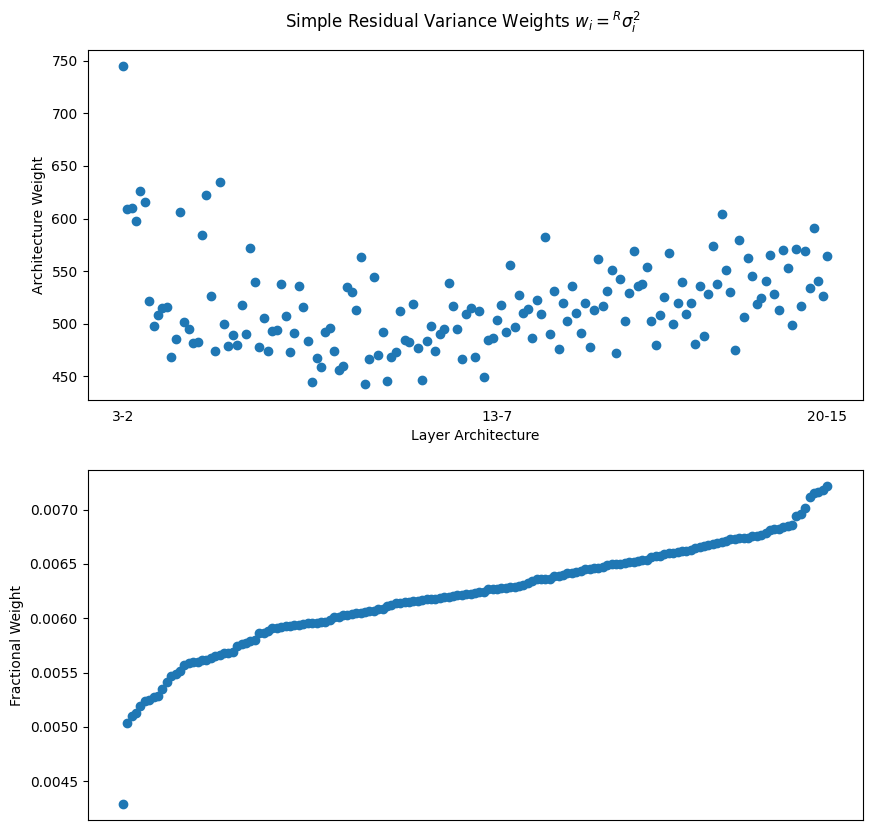

In [26]:

fig, ax = plt.subplots(2,1, figsize = (10,10))

plt.subplot(2,1,1)

plt.scatter(
    architecture_weights['layer architecture'],
    architecture_weights['aw_1']
)

plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=True)
plt.grid(False)
plt.xlabel('Layer Architecture')
plt.xticks([architecture_weights['layer architecture'].iloc[0], 
            architecture_weights['layer architecture'].iloc[85],
            architecture_weights['layer architecture'].iloc[160]])
plt.ylabel('Architecture Weight')



plt.subplot(2,1,2)

sum_of_weights = sum(1/architecture_weights['aw_1'])

plt.plot(
    np.sort(1/architecture_weights['aw_1'][::-1] )/ sum_of_weights, 'o'
#     marker = '.',
#     linestyle = None
    
)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.ylabel('Fractional Weight')
# string = '$w_{i} = \frac{1}{N_{g}N_{x}} \sum_{j}^{N_g} \sum_{k}^{N_x} \left(R_{ijk} - M_{i}\right)^2$'
plt.suptitle('Simple Residual Variance Weights $ w_i = {}^{R}_{}\sigma^{2}_{i}$', y = 0.92)

In [90]:
import pandas as pd

rootdir = 'zults/'
predictions = pd.DataFrame()
statistics = pd.DataFrame()
file_reader = pd.read_pickle(rootdir + 'model_statistics_' + '4' + '.pkl')
statistics = pd.concat([statistics, file_reader], ignore_index = True)

# statistics = statistics.drop('Unnamed: 0', axis = 1)
statistics['total parameters'] = statistics['total parameters'].astype(int)
statistics['trained parameters'] = statistics['trained parameters'].astype(int)
statistics['total inputs'] = statistics['total inputs'].astype(int)
statistics['test - train'] = (
    abs(statistics['test mae avg'] - statistics['train mae avg']))
statistics['paramater ratio'] = statistics['trained parameters'] / statistics['total inputs']
statistics

,layer architecture,total parameters,trained parameters,total inputs,test mae avg,train mae avg,test mae std dev,train mae std dev,architecture weight 1,architecture weight 2,test - train,paramater ratio
0,3-2,60,41,3069,17.888150,18.320922,4.794239,3.915898,145.110860,0.006891,0.432772,0.013359
1,4-2,72,53,3069,19.495260,19.487580,5.440397,4.502279,133.148514,0.007510,0.007680,0.017269
2,5-2,84,65,3069,16.948900,17.207373,4.296981,3.105293,153.152412,0.006529,0.258473,0.021180
3,6-2,96,77,3069,17.472450,17.441128,5.753468,3.278046,148.563301,0.006731,0.031322,0.025090
4,7-2,108,89,3069,18.054400,18.706029,4.467628,4.463059,143.774640,0.006955,0.651629,0.029000
...,...,...,...,...,...,...,...,...,...,...,...,...
156,16-15,450,431,3069,15.679167,16.010148,3.222594,0.768343,165.555028,0.006040,0.330981,0.140437
157,17-15,475,456,3069,15.743689,16.066999,3.108120,0.780996,164.876527,0.006065,0.323310,0.148583
158,18-15,500,481,3069,15.769674,16.090924,3.054389,0.852239,164.604852,0.006075,0.321250,0.156729
159,19-15,525,506,3069,15.665721,16.042760,3.150946,0.752430,165.697122,0.006035,0.377039,0.164875


In [91]:
data = pd.merge(statistics, aw, how = 'inner', on = 'layer architecture')
data

,layer architecture,total parameters,trained parameters,total inputs,test mae avg,train mae avg,test mae std dev,train mae std dev,architecture weight 1,architecture weight 2,test - train,paramater ratio,aw_1,simple var,std_1,IQR_1,bias_1,std_2,IQR_2,bias_2,std_3,IQR_3,bias_3,IQR_4,aw_2,aw_3,aw_4,var_1,var_2,var_3
0,3-2,60,41,3069,17.888150,18.320922,4.794239,3.915898,145.110860,0.006891,0.432772,0.013359,745.051943,848.008118,27.019189,0.65,15.015345,22.031031,0.53,16.192550,22.031031,0.53,13.805426,15.567548,501.558894,499.171771,848.008118,730.036598,485.366344,485.366344
1,4-2,72,53,3069,19.495260,19.487580,5.440397,4.502279,133.148514,0.007510,0.007680,0.017269,608.827207,618.440430,24.398230,0.61,13.553557,21.198463,0.53,14.055367,21.198463,0.53,13.283709,7.413118,463.430181,462.658523,618.440430,595.273650,449.374814,449.374814
2,5-2,84,65,3069,16.948900,17.207373,4.296981,3.105293,153.152412,0.006529,0.258473,0.021180,610.339410,822.752563,24.399938,0.58,14.982456,22.296495,0.53,15.443266,22.296495,0.53,13.971775,17.791484,512.576941,511.105450,822.752563,595.356954,497.133675,497.133675
3,6-2,96,77,3069,17.472450,17.441128,5.753468,3.278046,148.563301,0.006731,0.031322,0.025090,597.337156,766.819458,24.145896,0.58,14.312839,22.064354,0.53,14.339661,22.064354,0.53,13.826307,15.567548,501.175365,500.662011,766.819458,583.024317,486.835704,486.835704
4,7-2,108,89,3069,18.054400,18.706029,4.467628,4.463059,143.774640,0.006955,0.651629,0.029000,626.569117,741.704468,24.729485,0.60,15.021697,21.844378,0.53,15.731676,21.844378,0.53,13.688463,11.119677,492.908538,490.865325,741.704468,611.547420,477.176862,477.176862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,16-15,450,431,3069,15.679167,16.010148,3.222594,0.768343,165.555028,0.006040,0.330981,0.140437,533.792286,948.973206,22.761488,0.52,15.706934,23.199209,0.53,15.230605,23.199209,0.53,14.537448,20.015419,553.433916,552.740759,948.973206,518.085351,538.203311,538.203311
157,17-15,475,456,3069,15.743689,16.066999,3.108120,0.780996,164.876527,0.006065,0.323310,0.148583,590.794041,913.624878,23.987176,0.55,15.409427,23.114915,0.53,15.130714,23.114915,0.53,14.484626,20.756731,549.430014,548.783926,913.624878,575.384614,534.299299,534.299299
158,18-15,500,481,3069,15.769674,16.090924,3.054389,0.852239,164.604852,0.006075,0.321250,0.156729,540.292093,882.533386,22.927340,0.53,14.629165,22.927340,0.53,13.923596,22.927340,0.53,14.367085,19.274107,539.586525,540.030014,882.533386,525.662929,525.662929,525.662929
159,19-15,525,506,3069,15.665721,16.042760,3.150946,0.752430,165.697122,0.006035,0.377039,0.164875,526.804144,916.989563,22.622037,0.52,15.047602,23.057076,0.53,14.309415,23.057076,0.53,14.448382,19.274107,545.938159,546.077127,916.989563,511.756541,531.628744,531.628744


In [92]:
ticks = []
for i in range(0,161,20):
    print(i)
    ticks.append(i)

0
20
40
60
80
100
120
140
160


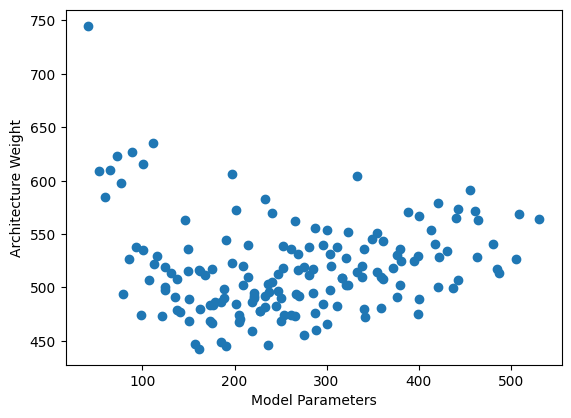

In [95]:
data = data.sort_values('trained parameters')
fig, ax = plt.subplots()
ax.grid(False)
ax.scatter(
    data['trained parameters'],
    (data['aw_1'])
)
# ax.set_xticks( ticks, rotation = 45, 
#                     labels = data['layer architecture'].iloc[ticks]
# )
# plt.grid(False)
# plt.xlabel('layer architecture')
# plt.ylabel('architecture weight')
# ax_upper = ax.twiny() 
# ax.set_xticks( ticks, rotation = 45, 
#                     labels = data['trained parameters'].iloc[ticks]
# )
# # ax.grid(False)
# ax_upper.grid(False)
ax.set_xlabel('Model Parameters')
# ax.set_xlabel('Model Layer Architecture')
ax.set_ylabel('Architecture Weight')
fig.subplots_adjust(top=0.85)


Text(0.5, 0.95, 'Architecture Weights as a Function of Model Complexity')

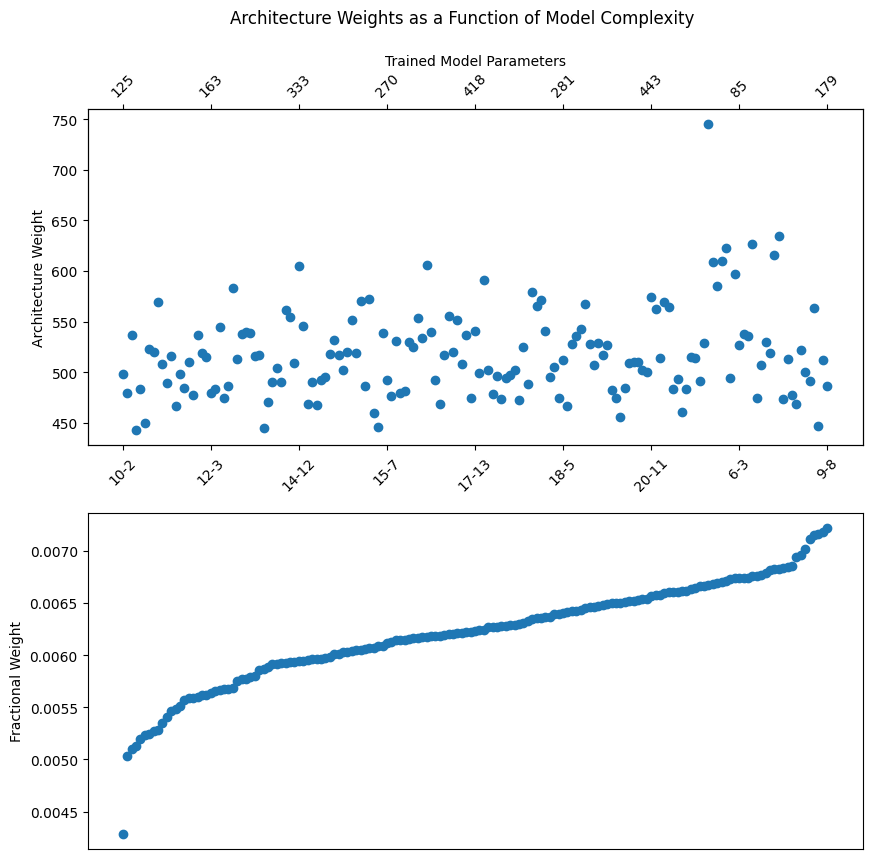

In [31]:
import matplotlib.pyplot as plt

# fig, ax = plt.subplots()
fig, ax = plt.subplots(2,1, figsize = (10,10))
plt.subplot(2,1,1)

# ax1 = fig.add_subplot(111)
ax[0].scatter(
    data['layer architecture'],
    (data['aw_1']),
#     c = data['trained parameters']
)



ax[0].set_xticks(ticks, rotation = 45, labels = data['layer architecture'].iloc[ticks])

# ax.grid(True)
# ax.set_xlabel('Layer Architecture')
ax2 = ax[0].twiny()
ax2.set_xticks( ax[0].get_xticks() )
ax2.set_xbound(ax[0].get_xbound())
ax2.set_xticks(ax[0].get_xticks(), rotation = 45, 
                    labels = data['trained parameters'].iloc[ticks]
)
# ax2.grid(True)
ax2.set_xlabel('Trained Model Parameters')
ax[0].set_ylabel('Architecture Weight')
# ax[0].tick_params(
#     axis='x',          
#     which='both',      
#     bottom=False,      
#     top=False,         
#     labelbottom=False)

plt.subplot(2,1,2)


sum_of_weights = sum(1/aw['aw_1'])

plt.plot(
    np.sort(1/aw['aw_1'][::-1] )/ sum_of_weights, 'o',
#     c = data['trained parameters']
#     marker = '.',
#     linestyle = None
    
)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.ylabel('Fractional Weight')


fig.subplots_adjust(top=0.85)
fig.suptitle('Architecture Weights as a Function of Model Complexity',y = 0.95)

0
20
40
60
80
100
120
140
160


Text(0, 0.5, 'Trained Model Parameters')

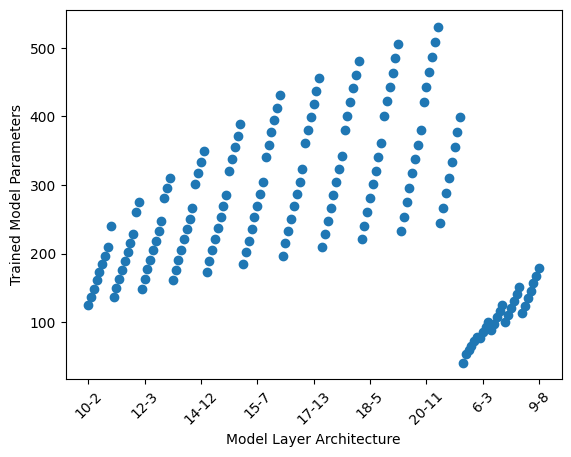

In [32]:
import matplotlib.pyplot as plt
plt.scatter(
    data['layer architecture'],
    data['trained parameters'],
#     c = data['aw_1']
)
ticks = []
for i in range(0,161,20):
    print(i)
    ticks.append(i)
plt.xticks(ticks, rotation = 45, labels = data['layer architecture'].iloc[ticks])
plt.xlabel('Model Layer Architecture')
plt.ylabel('Trained Model Parameters')
# plt.colorbar(label = 'Model Weight')

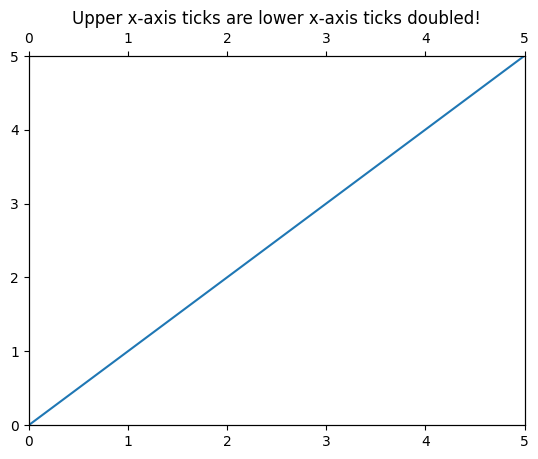

In [33]:
fig, ax1 = plt.subplots()

# ax1 = fig.add_subplot(111)

ax1.plot(
    (0,5),(0,5)
)
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)
# ax1.grid(True)

ax2 = ax1.twiny()
ax2.set_xticks( ax1.get_xticks() )
# ax2.set_xbound(ax1.get_xbound())
# ax2.set_xticklabels([x * 2 for x in ax1.get_xticks()])

title = ax1.set_title("Upper x-axis ticks are lower x-axis ticks doubled!")
# title.set_y(1.1)
# fig.subplots_adjust(top=0.85)

In [34]:
data

,aw_1,layer architecture,simple var,std_1,IQR_1,bias_1,std_2,IQR_2,bias_2,std_3,IQR_3,bias_3,IQR_4,aw_2,aw_3,aw_4,var_1,var_2,var_3,total parameters,trained parameters,total inputs,test mae avg,train mae avg,test mae std dev,train mae std dev,architecture weight 1,architecture weight 2,test - train,paramater ratio
0,497.740817,10-2,733.828003,22.011768,0.53,13.222903,22.011768,0.53,12.232375,22.011768,0.53,13.793355,15.567548,496.750289,498.311269,733.828003,484.517914,484.517914,484.517914,144,125,3069,16.702037,17.167450,4.271386,3.160873,155.416064,0.006434,0.465413,0.040730
1,479.065874,10-3,803.348511,21.603324,0.52,12.362251,22.018773,0.53,11.652128,22.018773,0.53,13.797745,17.050172,496.478488,498.624105,803.348511,466.703623,484.826360,484.826360,156,137,3069,16.735215,16.736063,5.092054,2.310302,155.107950,0.006447,0.000849,0.044640
2,536.201006,10-4,923.475281,22.837424,0.53,14.653066,22.837424,0.53,14.346387,22.837424,0.53,14.310741,20.015419,535.894327,535.858681,923.475281,521.547940,521.547940,521.547940,168,149,3069,15.636955,15.972586,2.992071,0.853691,166.001944,0.006024,0.335631,0.048550
3,442.665413,10-5,840.857788,20.782340,0.50,10.759741,22.029281,0.53,10.281909,22.029281,0.53,13.804329,18.532796,495.571122,499.093543,840.857788,431.905672,485.289213,485.289213,180,161,3069,15.921120,15.981354,3.152902,0.824784,163.039082,0.006133,0.060234,0.052460
4,483.758769,10-6,886.735779,21.693358,0.51,13.157002,22.544078,0.53,12.615883,22.544078,0.53,14.126919,19.274107,520.851316,522.362353,886.735779,470.601767,508.235434,508.235434,192,173,3069,15.726036,16.028927,3.133617,0.857790,165.061614,0.006058,0.302891,0.056370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,491.333674,9-4,919.944092,21.851415,0.51,13.849347,22.708333,0.53,13.464735,22.708333,0.53,14.229848,20.015419,529.133123,529.898235,919.944092,477.484327,515.668387,515.668387,154,135,3069,15.768461,16.050569,2.955263,0.772067,164.617517,0.006075,0.282108,0.043988
157,562.983907,9-5,968.077332,23.405902,0.54,15.147659,22.972459,0.53,15.176637,22.972459,0.53,14.395359,20.756731,542.910527,542.129248,968.077332,547.836249,527.733890,527.733890,165,146,3069,15.709313,15.987350,3.048889,0.875112,165.237321,0.006052,0.278037,0.047572
158,446.867131,9-6,823.874268,20.851819,0.50,12.068793,22.102928,0.53,11.651417,22.102928,0.53,13.850479,16.308860,500.190830,502.389892,823.874268,434.798338,488.539413,488.539413,176,157,3069,16.401166,16.710129,4.232688,2.660571,158.267092,0.006318,0.308963,0.051157
159,511.865307,9-7,919.921814,22.314691,0.52,13.919880,22.743820,0.53,13.637553,22.743820,0.53,14.252085,20.015419,530.918879,531.533411,919.921814,497.945428,517.281326,517.281326,187,168,3069,15.644771,15.981705,3.142499,0.834083,165.919004,0.006027,0.336934,0.054741


In [35]:
data

,aw_1,layer architecture,simple var,std_1,IQR_1,bias_1,std_2,IQR_2,bias_2,std_3,IQR_3,bias_3,IQR_4,aw_2,aw_3,aw_4,var_1,var_2,var_3,total parameters,trained parameters,total inputs,test mae avg,train mae avg,test mae std dev,train mae std dev,architecture weight 1,architecture weight 2,test - train,paramater ratio
0,497.740817,10-2,733.828003,22.011768,0.53,13.222903,22.011768,0.53,12.232375,22.011768,0.53,13.793355,15.567548,496.750289,498.311269,733.828003,484.517914,484.517914,484.517914,144,125,3069,16.702037,17.167450,4.271386,3.160873,155.416064,0.006434,0.465413,0.040730
1,479.065874,10-3,803.348511,21.603324,0.52,12.362251,22.018773,0.53,11.652128,22.018773,0.53,13.797745,17.050172,496.478488,498.624105,803.348511,466.703623,484.826360,484.826360,156,137,3069,16.735215,16.736063,5.092054,2.310302,155.107950,0.006447,0.000849,0.044640
2,536.201006,10-4,923.475281,22.837424,0.53,14.653066,22.837424,0.53,14.346387,22.837424,0.53,14.310741,20.015419,535.894327,535.858681,923.475281,521.547940,521.547940,521.547940,168,149,3069,15.636955,15.972586,2.992071,0.853691,166.001944,0.006024,0.335631,0.048550
3,442.665413,10-5,840.857788,20.782340,0.50,10.759741,22.029281,0.53,10.281909,22.029281,0.53,13.804329,18.532796,495.571122,499.093543,840.857788,431.905672,485.289213,485.289213,180,161,3069,15.921120,15.981354,3.152902,0.824784,163.039082,0.006133,0.060234,0.052460
4,483.758769,10-6,886.735779,21.693358,0.51,13.157002,22.544078,0.53,12.615883,22.544078,0.53,14.126919,19.274107,520.851316,522.362353,886.735779,470.601767,508.235434,508.235434,192,173,3069,15.726036,16.028927,3.133617,0.857790,165.061614,0.006058,0.302891,0.056370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,491.333674,9-4,919.944092,21.851415,0.51,13.849347,22.708333,0.53,13.464735,22.708333,0.53,14.229848,20.015419,529.133123,529.898235,919.944092,477.484327,515.668387,515.668387,154,135,3069,15.768461,16.050569,2.955263,0.772067,164.617517,0.006075,0.282108,0.043988
157,562.983907,9-5,968.077332,23.405902,0.54,15.147659,22.972459,0.53,15.176637,22.972459,0.53,14.395359,20.756731,542.910527,542.129248,968.077332,547.836249,527.733890,527.733890,165,146,3069,15.709313,15.987350,3.048889,0.875112,165.237321,0.006052,0.278037,0.047572
158,446.867131,9-6,823.874268,20.851819,0.50,12.068793,22.102928,0.53,11.651417,22.102928,0.53,13.850479,16.308860,500.190830,502.389892,823.874268,434.798338,488.539413,488.539413,176,157,3069,16.401166,16.710129,4.232688,2.660571,158.267092,0.006318,0.308963,0.051157
159,511.865307,9-7,919.921814,22.314691,0.52,13.919880,22.743820,0.53,13.637553,22.743820,0.53,14.252085,20.015419,530.918879,531.533411,919.921814,497.945428,517.281326,517.281326,187,168,3069,15.644771,15.981705,3.142499,0.834083,165.919004,0.006027,0.336934,0.054741


In [37]:
# data[(data['architecture weight'] == data['architecture weight'].min())]

In [38]:
plt.scatter(
    aw.index,
    (aw['simple sig'])**2
)

KeyError: 'simple sig'

In [39]:
for i in range(1,4,1):
    plt.scatter(
        aw.index,
        aw['bias'+str(i)], 
        label = 'Interpretation '+str(i)
    )
plt.ylabel('Model Bias')
plt.xlabel('Architecture Index')
plt.legend()

KeyError: 'bias1'

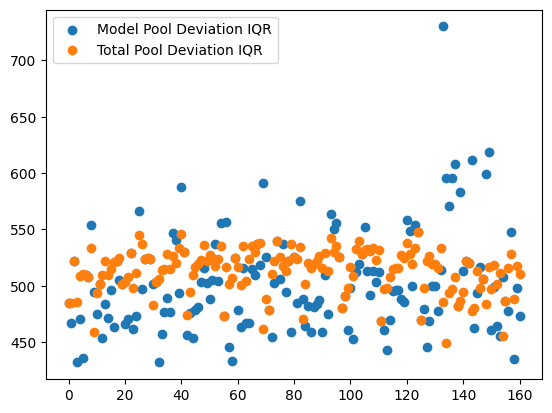

In [40]:
plt.scatter(
    aw.index,
    aw['var_1'],
    label = 'Model Pool Deviation IQR'
)
plt.scatter(
    aw.index,
    aw['var_2'],
    label = 'Total Pool Deviation IQR'
)
plt.legend()
plt.show()

In [41]:
plt.scatter(
    aw.index,
    aw['var_1'] + aw['bias1'],
    alpha = 0.5,
    label = 'Weight 1'
)
plt.scatter(
    aw.index,
    aw['var_1'] + aw['bias2'],
    alpha = 0.5,
    label = 'Weight 2'
)
plt.scatter(
    aw.index,
    aw['var_1'] + aw['bias3'],
    alpha = 0.5,
    label = 'Weight 3'
)
plt.scatter(
    aw.index,
    aw['var_2'] + aw['bias1'],
    alpha = 0.5,
    label = 'Weight 4'
)
plt.scatter(
    aw.index,
    aw['var_2'] + aw['bias2'],
    alpha = 0.5,
    label = 'Weight 5'
)
plt.scatter(
    aw.index,
    aw['var_2'] + aw['bias3'],
    alpha = 0.5,
    label = 'Weight 6'
)
plt.legend()
plt.show()

KeyError: 'bias1'

In [42]:
1 / sum(1/architecture_weights['architecture weight'])

KeyError: 'architecture weight'

In [43]:
plt.scatter(architecture_weights.index, architecture_weights['architecture weight'])

KeyError: 'architecture weight'

Text(0.5, 0.92, 'Simple Residual Variance Weights $ w_i = {}^{R}_{}\\sigma^{2}_{i}$')

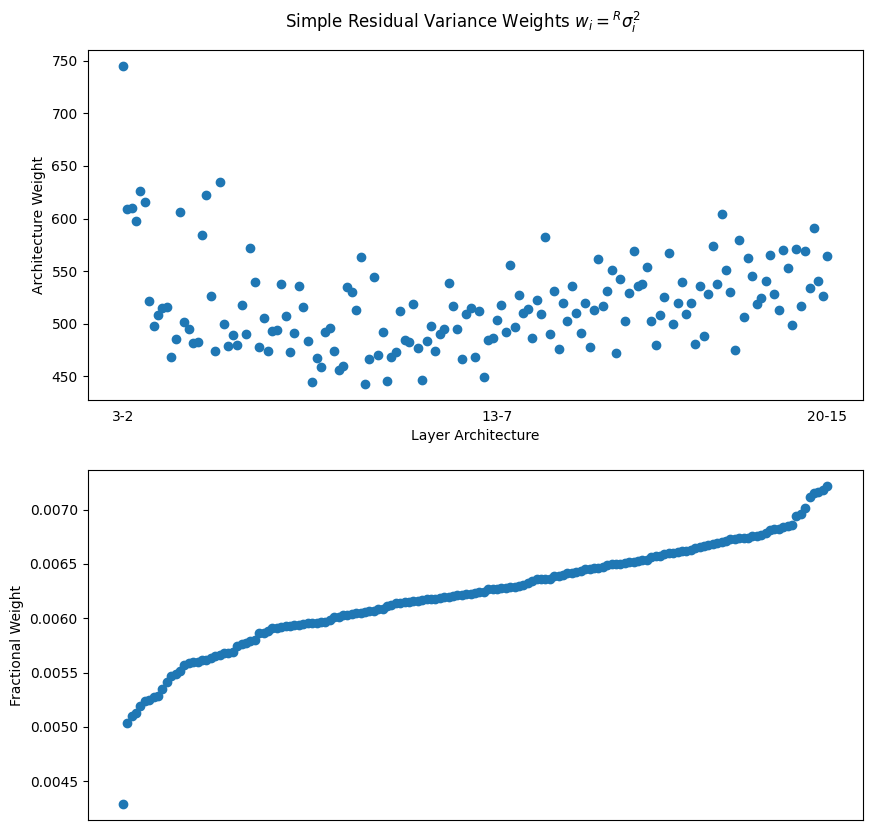

In [44]:

fig, ax = plt.subplots(2,1, figsize = (10,10))

plt.subplot(2,1,1)

plt.scatter(
    architecture_weights['layer architecture'],
    architecture_weights['aw_1']
)

plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=True)
plt.grid(False)
plt.xlabel('Layer Architecture')
plt.xticks([architecture_weights['layer architecture'].iloc[0], 
            architecture_weights['layer architecture'].iloc[85],
            architecture_weights['layer architecture'].iloc[160]])
plt.ylabel('Architecture Weight')



plt.subplot(2,1,2)

sum_of_weights = sum(1/architecture_weights['aw_1'])

plt.plot(
    np.sort(1/architecture_weights['aw_1'][::-1] )/ sum_of_weights, 'o'
#     marker = '.',
#     linestyle = None
    
)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.ylabel('Fractional Weight')
# string = '$w_{i} = \frac{1}{N_{g}N_{x}} \sum_{j}^{N_g} \sum_{k}^{N_x} \left(R_{ijk} - M_{i}\right)^2$'
plt.suptitle('Simple Residual Variance Weights $ w_i = {}^{R}_{}\sigma^{2}_{i}$', y = 0.92)

In [45]:
plt.plot(
    1/np.cumsum(1/aw['architecture weight'])
)

KeyError: 'architecture weight'

In [ ]:

fig, ax = plt.subplots(2,1, figsize = (10,10))

plt.subplot(2,1,1)

plt.scatter(
    architecture_weights['layer architecture'],
    architecture_weights['architecture weight']
)

plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=True)
plt.grid(False)
plt.xlabel('Layer Architecture')
plt.xticks([architecture_weights['layer architecture'].iloc[0], 
            architecture_weights['layer architecture'].iloc[85],
            architecture_weights['layer architecture'].iloc[160]])
plt.ylabel('Architecture Weight')



plt.subplot(2,1,2)

sum_of_weights = sum(1/architecture_weights['architecture weight'])

plt.plot(
    np.sort(1/architecture_weights['architecture weight'][::-1]) / sum_of_weights, 'o'
#     marker = '.',
#     linestyle = None
    
)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.ylabel('Fractional Weight')

KeyError: 'architecture weight'

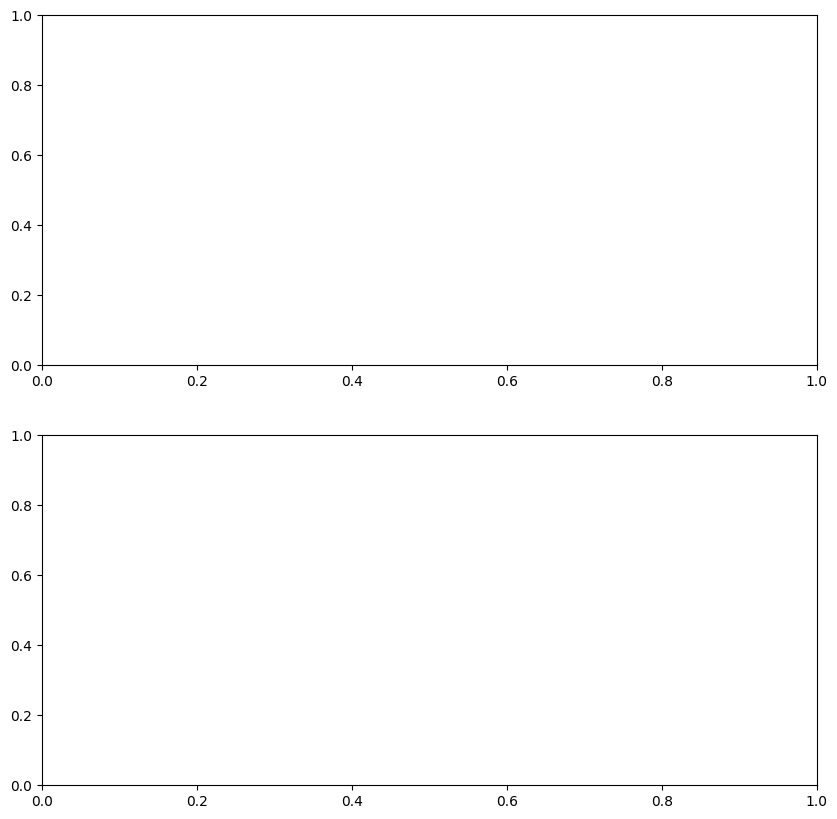

In [46]:

fig, ax = plt.subplots(2,1, figsize = (10,10))

plt.subplot(2,1,1)

plt.scatter(
    architecture_weights['layer architecture'],
    architecture_weights['architecture weight']
)

plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=True)
plt.grid(False)
plt.xlabel('Layer Architecture')
plt.xticks([architecture_weights['layer architecture'].iloc[0], 
            architecture_weights['layer architecture'].iloc[85],
            architecture_weights['layer architecture'].iloc[160]])
plt.ylabel('Architecture Weight')



plt.subplot(2,1,2)

sum_of_weights = sum(1/architecture_weights['architecture weight'])

plt.plot(
    np.sort(1/architecture_weights['architecture weight'])[::-1] / sum_of_weights, 'o'
#     marker = '.',
#     linestyle = None
    
)


In [47]:
print('Compiling predictions...')
arch_list = architecture_weights['layer architecture']
df = pd.DataFrame(columns = [
        'RGIId','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
])
for arch in tqdm(arch_list):
    df_glob = gl.load_global_predictions(
        parameterization = parameterization,
        architecture = arch
    )

    df = pd.concat([df,df_glob])
#     break
statistics = pd.DataFrame()
for file in (os.listdir('zults/')):
    if 'statistics_' + parameterization in file:
        file_reader = pd.read_pickle('zults/' + file)
        statistics = pd.concat([statistics, file_reader], ignore_index = True)

# df = pd.merge(df, statistics, on = 'layer architecture')
df = df[[
        'layer architecture','RGIId','0', '1', '2', '3', '4',
        '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24'
]]

Compiling predictions...


  0%|          | 0/161 [00:00<?, ?it/s]


TypeError: load_global_predictions() missing 1 required positional argument: 'loss'

In [48]:
df

,RGIId,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24


In [49]:
df = pd.read_hdf(
    'predicted_thicknesses/compiled_raw_4.h5', key = 'compiled_raw', mode = 'a'
)

FileNotFoundError: File predicted_thicknesses/compiled_raw_4.h5 does not exist

In [ ]:
compiled_raw = df.groupby('RGIId')[[
        'layer architecture','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24'
]]

In [50]:
compiled_raw

NameError: name 'compiled_raw' is not defined

In [51]:
def GB_D_common_estimator(n, S, X):
    mu = sum((n / S)*X) / sum(n / S)
    
    return mu

def unbiased_variance_estimator(n_m, n_x, sigma_m, sigma_x):
    
    q_1 = 4 / (n_m - 1)
    q_2 = (n_m / sigma_m) / sum(n_x/sigma_x)
    q_3 = (n_m / sigma_m**2) / sum(n_x/sigma_x)**2
    q_4 = sum(n_m / sigma_m)
    
    var = (
        (1 + sum(q_1 * (q_2 - q_3))) / q_4
    )
    return var

In [52]:
dft = pd.DataFrame()
for this_rgi_id, obj in tqdm(compiled_raw):
#     print(obj['layer architecture'])
    rgi_id = pd.Series(this_rgi_id, name = 'RGIId')
    print(rgi_id)
#     print(rgi_id)
#         print(f"Data associated with RGI_ID = {this_rgi_id}:")
    dft = pd.concat([dft, rgi_id])
    dft = dft.reset_index()
    dft = dft.drop('index', axis = 1)
    obj = obj[[
        'layer architecture','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
    ]]
    
#     obj = pd.merge(obj, architecture_weights, how = 'inner', on = 'layer architecture')

    
#     arch_weight = obj[['architecture weight']]
    
#     aw = arch_weight.values.flatten()

    predictions = obj[[
        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
    ]]
    
#     arch_weight = obj[['architecture weight']]
#     aw = arch_weight.values.flatten()
#     pr = np.array(predictions.values)

    
#     print(pr)
#     weighted_mean = 0
#     for p, w in zip(pr, aw):
#         weighted_mean = weighted_mean + np.nanmean(p/w)
#     weighted_mean = weighted_mean / sum(1/aw)
    
    
#     dft.loc[dft.index[-1], 'Weighted Mean Thickness'] = weighted_mean
    
    
    
    
#     print(
#             pr[:][1:5]
#     )
#     print(
#         np.mean(
#             pr[:][0:160]
#         )
#     )
#     print(
#             np.var(pr[:][0:160])
#     )
#     print(
#             np.sqrt(
#                 np.var(pr[:][0:160])
#             )
#     )    
    
    
    
    
    break
predictions

NameError: name 'compiled_raw' is not defined

In [53]:
est

NameError: name 'est' is not defined

In [ ]:
dft = pd.DataFrame()
for this_rgi_id in tqdm(est['RGIId'].unique()):
    dfr = est[est['RGIId'] == this_rgi_id]
    rgi_id = pd.Series(this_rgi_id, name = 'RGIId')
#     print(rgi_id)
#     print(rgi_id)
#         print(f"Data associated with RGI_ID = {this_rgi_id}:")
    dft = pd.concat([dft, rgi_id])
    dft = dft.reset_index()
    dft = dft.drop('index', axis = 1)
    obj = dfr[[
        'layer architecture','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
    ]]
    
#     architecture_weights = pd.read_csv('architecture_weights.csv')
#     architecture_weights = architecture_weights.drop('Unnamed: 0', axis = 1)
    
    obj = pd.merge(obj, architecture_weights, how = 'inner', on = 'layer architecture')

    
#     print(obj)
    arch_weight = obj[['architecture weight']]
    
    aw = arch_weight.values.flatten()

#     print(arch_weight)
    predictions = obj[[
        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
    ]]
    
#     std = 
    
    pr = np.array(predictions.values)
    variance = pr.var()
    weighted_mean = 0
    for p, w in zip(pr, aw):
        weighted_mean = weighted_mean + (p/w)
    weighted_mean = weighted_mean.mean().mean() / sum(1/aw)
#     print(weighted_mean)
    residual = (weighted_mean - dfr['Thickness'].mean())
#     print('plain mean = ' + str(predictions.mean().mean()))
#     print('weighted mean = ' + str(
#         np.nansum(
#             predictions.div(
#             arch_weight.values).values) / np.nansum(1/arch_weight.values)
#         weighted_mean
#     ) 
#     )

#     var = sd**2
#     print(pr.flatten().var())
#     print(pr.var())
    var = pr.var(axis = 1)
    var = predictions.values
    dft.loc[dft.index[-1], 'Weighted Mean Thickness'] = weighted_mean
    dft.loc[dft.index[-1], 'Model Variance'] = variance
    dft.loc[dft.index[-1], 'Residual'] = residual
    dft.loc[dft.index[-1], 'Thickness'] = dfr['Thickness'].mean()
    dft.loc[dft.index[-1], 'Area'] = dfr['Area'].mean()
               
#     break
dft